In [191]:
import pandas as pd

In [192]:
df = pd.read_csv("troop_movements.csv")

In [193]:
df.shape

(1000, 9)

In [194]:
df.head(
)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-03-17 14:53:30,1,at-at,resistance,4,10,9,7,Skako
1,2025-03-17 14:53:29,2,tie_silencer,resistance,5,2,10,6,Alderaan
2,2025-03-17 14:53:28,3,stormtrooper,empire,1,1,3,5,Toydaria
3,2025-03-17 14:53:27,4,resistance_soldier,resistance,4,8,6,9,Shili
4,2025-03-17 14:53:26,5,resistance_soldier,empire,7,9,3,9,Glee Anselm


In [195]:
emp_or_res = df.groupby('empire_or_resistance').size().reset_index(name='counts')
print(emp_or_res)

  empire_or_resistance  counts
0               empire     506
1           resistance     494


In [196]:
homeworld = df.groupby('homeworld').size().reset_index(name='counts')
print(homeworld)

       homeworld  counts
0       Alderaan      10
1    Aleen Minor      25
2     Bestine IV      26
3          Cerea      24
4       Champala      24
5      Chandrila      26
6   Concord Dawn      26
7       Corellia      22
8        Dagobah      28
9       Dathomir      24
10         Dorin      21
11        Eriadu      26
12   Glee Anselm      23
13    Haruun Kal      23
14       Iktotch      30
15      Iridonia      17
16         Kalee      21
17      Kashyyyk      21
18     Malastare      18
19        Mirial      33
20      Mon Cala      21
21    Muunilinst      19
22         Naboo      28
23          Ojom      25
24       Quermia      22
25         Rodia      22
26        Ryloth      19
27       Serenno      23
28         Shili      24
29         Skako      24
30       Socorro      19
31       Stewjon      21
32       Sullust      30
33      Tatooine      28
34       Tholoth      30
35      Toydaria      28
36     Trandosha      22
37       Troiken      21
38          Tund      30


In [197]:
unit_type = df.groupby('unit_type').size().reset_index(name='counts')
print(unit_type)

            unit_type  counts
0               at-at     126
1               at-st     116
2  resistance_soldier     140
3        stormtrooper     127
4         tie_fighter     133
5        tie_silencer     135
6             unknown      99
7              x-wing     124


In [198]:
df['is_resistance'] = df['empire_or_resistance'].apply(lambda x: x.lower() == 'resistance')
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2025-03-17 14:53:30,1,at-at,resistance,4,10,9,7,Skako,True
1,2025-03-17 14:53:29,2,tie_silencer,resistance,5,2,10,6,Alderaan,True
2,2025-03-17 14:53:28,3,stormtrooper,empire,1,1,3,5,Toydaria,False
3,2025-03-17 14:53:27,4,resistance_soldier,resistance,4,8,6,9,Shili,True
4,2025-03-17 14:53:26,5,resistance_soldier,empire,7,9,3,9,Glee Anselm,False


In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

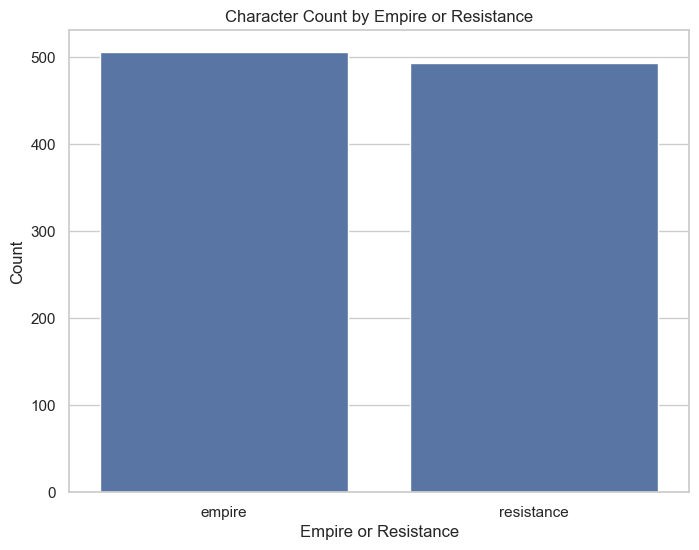

In [200]:
counts = df['empire_or_resistance'].value_counts()
counts_df = pd.DataFrame({'empire_or_resistance': counts.index, 'count': counts.values})

plt.figure(figsize=(8, 6))
sns.barplot(x='empire_or_resistance', y='count', data=counts_df)
plt.title('Character Count by Empire or Resistance')
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
plt.show()

Accuracy: 0.59


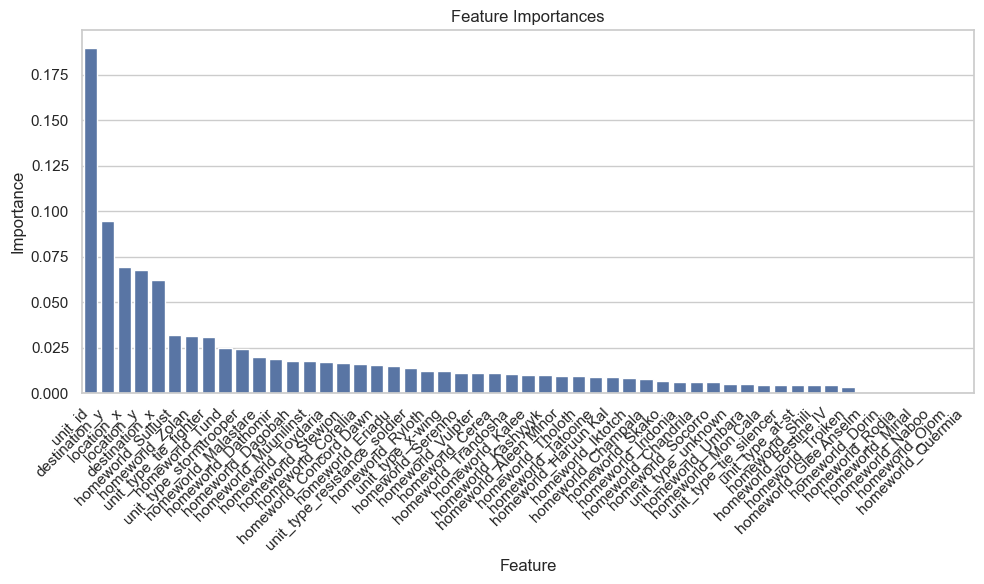

Model saved to trained_model.pkl
Sample prediction: ['resistance']


In [201]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import pickle

# Load your data
df = pd.read_csv('troop_movements.csv')

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract numerical timestamp features

# Handle missing values
df = df.dropna(subset=['homeworld', 'unit_type'])

# One-hot encode categorical features
df_dummies = pd.get_dummies(df, columns=['homeworld', 'unit_type'], drop_first=True)

# Define features (X) and target (y)
X = df_dummies.drop(['empire_or_resistance', 'timestamp'], axis=1)  # Drop timestamp column
y = df_dummies['empire_or_resistance']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Feature Importances
importances = clf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Bar Plot of Feature Importance
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Feature', y='Importance', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout() # Improves layout spacing
plt.show()

# Save the model to a pickle file
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(clf, f)
print("Model saved to trained_model.pkl")

# Load the model from the pickle file
with open('trained_model.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)

# Verify that the loaded model works by making a prediction
sample_prediction = loaded_clf.predict(X_test[:1])
print(f"Sample prediction: {sample_prediction}")



In [202]:
df = pd.read_csv("troop_movements_1m.csv")

df['unit_type'] = df['unit_type'].replace("invalid_unit", "unknown")

df['location_x'] = df['location_x'].fillna(method='ffill')
df['location_y'] = df['location_y'].fillna(method='ffill')



C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_5300\3157588944.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['location_x'] = df['location_x'].fillna(method='ffill')
C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_5300\3157588944.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['location_y'] = df['location_y'].fillna(method='ffill')


In [203]:
# Save the cleaned data to a Parquet file
df.to_parquet('troop_movements_1m.parquet', engine='pyarrow')


In [204]:
# Load the trained model
with open('trained_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load clean data from parquet file
parquet_df = pd.read_parquet('troop_movements_1m.parquet')

# Define the features used during training
features = ['homeworld', 'unit_type']
new_data = parquet_df[features]  # Features

# Convert categorical features to numeric using one-hot encoding
new_data_encoded = pd.get_dummies(new_data)

# Align the new data with the training data columns
# Assuming 'training_columns' is a list of columns used during training
training_columns = model.feature_names_in_  # This assumes the model has this attribute
new_data_encoded = new_data_encoded.reindex(columns=training_columns, fill_value=0)

# Make predictions
predictions = model.predict(new_data_encoded)
predictions_bool = (predictions == 'resistance')


# You can use the predictions as desired
print(predictions)


['resistance' 'empire' 'resistance' ... 'resistance' 'resistance' 'empire']


In [205]:
parquet_df['predictions'] = predictions_bool
parquet_df.head()

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld,predictions
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor,True
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare,False
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno,True
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund,False
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako,True
